# Agenda:
1. Curse of Dimensionality
2. Dimensionality Reduction
3. PCA(Principle Component Analysis)
4. Feature Selection techniques

# Curse of Dimensionality

- Many ML problems involve thousands or even millions of features for each training instance. ( For a 2D tablular data features are just columns, but for a 3D data it cannot be just columns)
- 1st challenge :Having millions of features in the data increases the model training time.
- 2nd challenge : It becomes harder to find a good solution for data with millions of features.

- These problems combinedly are called as "Curse of Dimensionality" (means having millions of features in the data)

# Dimensionality Reduction:

- The solution to "Curse of Dimensionality" problem is Dimenionality Reduction:
- Dimenionality Reduction means reducing the number of features present in the data.
- Reducing the number of features does not mean that features from the data are to be deleted.
- It simly means converting the data from higher dimensional space to a lower dimensional space.
- When doing this care has to taken that "maximum information" from the higher dimensional data is retained into the lower dimensional space.
- When doing this it is quite sure that some amount of information will be lost.

# Main Approaches for Dimensionality Reduction:
1. Projection : Principal Component Analysis(PCA), Kernel PCA
2. Manifold Learning : LLE

# Projection:

In [1]:
import pandas as pd
data = pd.DataFrame({
    "col1" : [2, 8, 1, 4, 22, 15, 25, 29, 4, 2],
    "col2" : [3, 6, 2, 6, 18, 16, 20, 23, 6, 4]
}
)
data

,col1,col2
0,2,3
1,8,6
2,1,2
3,4,6
4,22,18
5,15,16
6,25,20
7,29,23
8,4,6
9,2,4


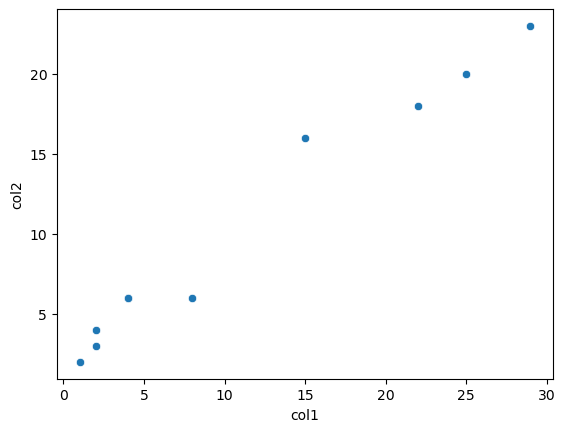

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.scatterplot(x = data["col1"], y = data['col2'])
plt.show()

# Observation:
1. The data is 2 Dimensional.
2. To perform Projection(Dimensionality Reduction) of the above,we need to project the data to 1 Dimensional.


### Variance : Indicates the spread of the data from the center(mean/median/ mode)

In [3]:
data['col1'].mean()

11.2

In [4]:
data['col1'].var()

113.95555555555555

In [5]:
data

,col1,col2
0,2,3
1,8,6
2,1,2
3,4,6
4,22,18
5,15,16
6,25,20
7,29,23
8,4,6
9,2,4


In [6]:
data['col2'].mean()

10.4

In [7]:
data['col2'].var()

62.71111111111111

# Projection:

- We have to select the features which is giving the maximum variance.
- The col1 variance is higher compared to col2 variance. It means to convert the 2D data into 1D, we can say col1 is explaining the data very well. In other words, it simply means, that col1 contains the maximum information about the data.
- In the above, we concluded that col1 contains the max info. It does not mean that we will get rid of col2 and retain only col1 in the data.
- Basically, when a projection technique is applied, The original cols are lost and a new set of columns are derived which retain the max info.

- This Projection works very well when the data is linear in nature.
- Q. What if the data is non linear in nature.

# Manifold Learning:
- For Dimensionality of Non Linear Data, we cannot go for projection.
- Manifold learning is choice.
- Locally Linear Embedding (LLE)

# Projection : PCA

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Seperate X and y

In [10]:
X = data.drop("species", axis = 1)
y = data["species"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# apply log reg

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [13]:
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

# Using PCA to reduce the dimensions of the data

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)   ## n_components is used to specify the no of dimensions

In [17]:
res = pca.fit_transform(X)
res

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [19]:
pca_data = pd.DataFrame(res, columns = ["PC1", "PC2", "PC3"])
pca_data["species"] = y
pca_data

,PC1,PC2,PC3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


In [20]:
## Check the explained variance Ratio

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

# Observations:

- We see that 92.5 % of information from the original data is explained by PC1
- 5.3% of the information is explained by PC2.

In [ ]:
pca_data

In [ ]:
X = pca_data.drop("species", axis = 1)
y = pca_data["species"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

# Observations:

- the intial accuracy with 4 features in our data was 97.36%.
- After PCA, with only 2 features the accuracy remains the same.

# How to select the best number of components for the data

- It is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance(i.e. 95%).
- When you calculate the explained variance ratio, taken 2 or 3 components and check if the variacne is adding to 95%.

In [21]:
# Even better way to select the best dimension is to let the PCA itself decide that.

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca

PCA(n_components=0.95)

#### pca = PCA(n_components = 0.95) means that selection whichever principle component but the final variance explained ratio must be greater than or equal to 95%

# Types of PCA
- PCA
- Compression PCA
- Incremental PCA
- Kernel PCA